# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [14]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')

**[Task 1.2.]()** Quantify the image into 256 bins:

In [4]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [5]:
h = np.zeros(256, dtype =int) # Histogram Initialisieren 
for intensity in range(256): 
    h[intensity] = np.sum(img8 == intensity)

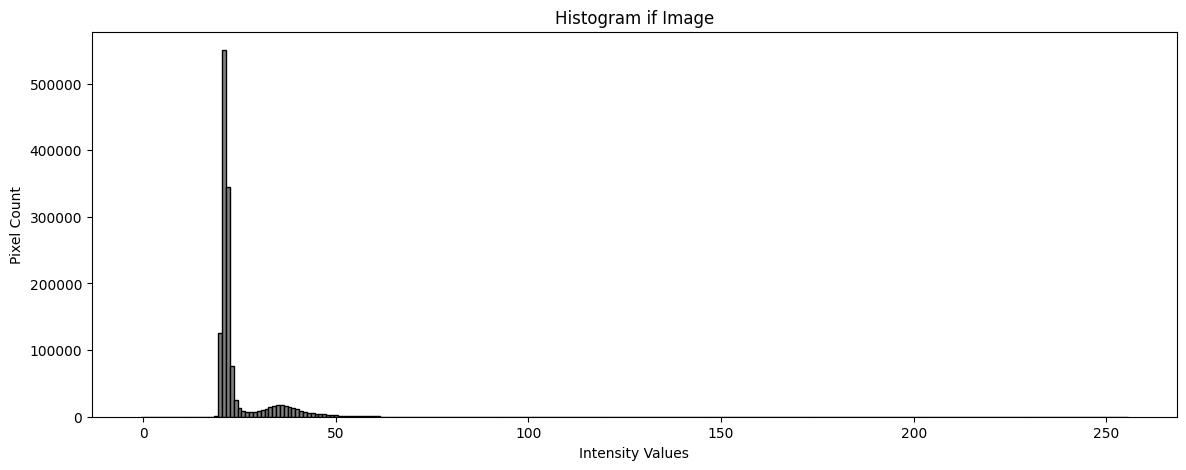

In [10]:
plt.figure(figsize = (14, 5))
plt.bar(range(256), h, width=1, color = 'gray', edgecolor = 'black')
plt.title('Histogram if Image')
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

Show the computed histogram:

<BarContainer object of 256 artists>

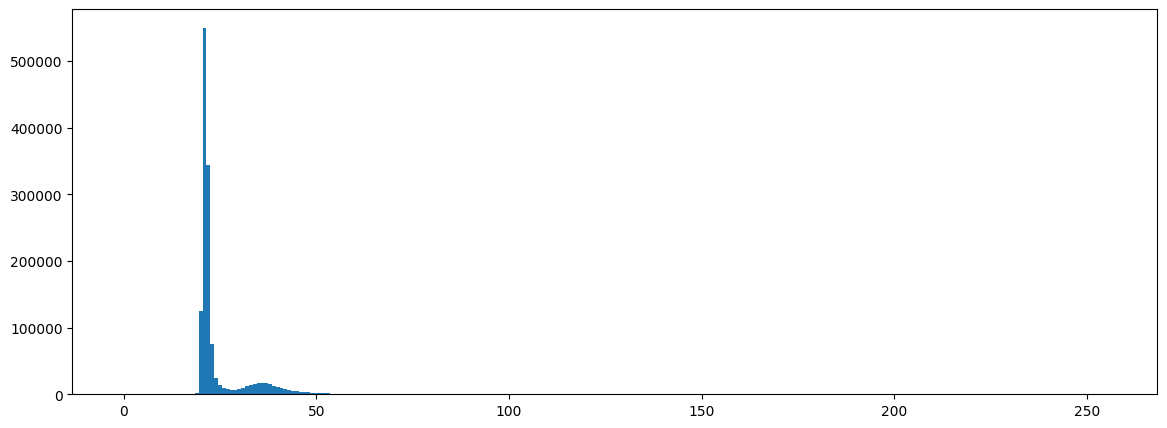

In [11]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [ ]:
def otsu_thresholding(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256)) # Berechne das Histogramm des Bildes (Häufigkeit der Intensitätswerte)
    total_pixels = image.size # Gesamtanzahl der Pixel im Bild

    # Initialisierung für maximale Varianz zwischen den Klassen und optimalen Schwellenwert
    max_var_between = 0 
    optimal_threshold = 0

    sum_total = np.dot(np.arange(256), hist) # Gesamtsumme der Intensitätswerte, gewichtet mit der Häufigkeit --> Berechnung des Mittelwertes 
    sum_bg = 0
    weight_bg = 0
    weight_fg = 0

    # Iteriere über alle möglichen Schwellenwerte (t = 0 bis 255)
    for t in range(256):
        weight_bg += hist[t] # Addiere die Pixel des aktuellen Schwellenwertes zum Hintergrund
        weight_fg = total_pixels - weight_bg

        if weight_bg == 0 or weight_fg == 0:
            continue

        sum_bg += t * hist[t] # Aktualisiere die Summe der Intensitätswerte im Hintergrund

        mean_bg = sum_bg / weight_bg # Mittelwert des Hintergrunds --> Pixel mit Intensitätswerten zwischen 0 und t-1
        mean_fg = (sum_total - sum_bg) / weight_fg  # Mittelwert des Vordergrunds --> Pixel mit Intensitätswerten zwischen 0 und 255 

        var_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2 # Varianz zwischen den Klassen (Otsu-Kriterium)

        if var_between > max_var_between:
            max_var_between = var_between
            optimal_threshold = t # Aktualisiere den maximalen Schwellenwert, falls die Varianz größer ist

    return optimal_threshold


**[Task 1.5.]()** Perform Otsu thresholding:

In [15]:
optimal_threshold = otsu_thresholding(imgf)
print("Optimal Threshold:", optimal_threshold)

segmented_image = (imgf >= optimal_threshold).astype(np.uint8)

Optimal Threshold: 0


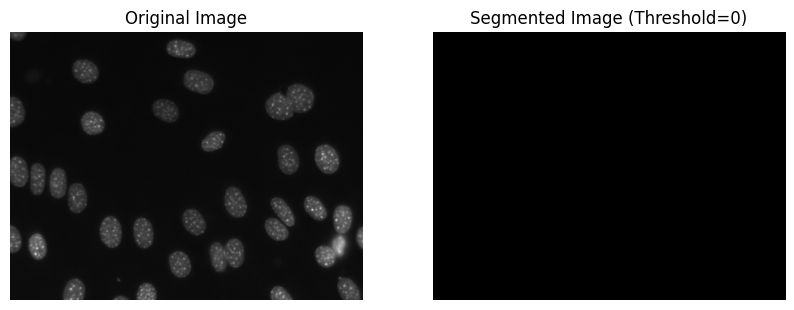

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imgf, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (Threshold={optimal_threshold})")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()

**[Task 1.6.]()** Compute the Dice coefficient:

In [16]:
def dice_coefficient(segmented, ground_truth):
    intersection = np.logical_and(segmented, ground_truth).sum()
    dice = (2. * intersection) / (segmented.sum() + ground_truth.sum())
    return dice

In [20]:
ground_truth = np.zeros_like(imgf)
ground_truth[100:200, 100:200] = 1  # Example ground truth

dice_score = dice_coefficient(segmented_image, ground_truth)
print("Dice Coefficient:", dice_score)

Dice Coefficient: 0.01442734963816207
